# Ni'ma Tusyafa'ah PYTN-KS19-015

# Python for Data Science by Hacktiv8

# **Final Projects 2 - Logistic Regression dan SVM**

### Perkenalan (Business and Data Understanding)

Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

Outline Notebook:

1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data Cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Kesimpulan

### Project Overview

Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia, kolom Rain Tomorrow adalah target variable yang mau kita prediksi. Jika "Yes" maka besok harinya disana hujan 1mm atau lebih

### Attribute Information:

1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

### Objektif

Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:

1. Mampu memahami konsep Classification dengan Logistic Regression dan SVM
2. Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
3. Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

Dataset Link : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

## IMPORT LIBRARIES

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project

In [4]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


1. import pandas as pd: Mengimpor library pandas dengan alias pd. Pandas digunakan untuk manipulasi dan analisis data tabular.

2. import numpy as np: Mengimpor library numpy dengan alias np. Numpy adalah library untuk operasi matematika dan manipulasi array multidimensi.

3. %matplotlib inline: Perintah ini digunakan di lingkungan Jupyter Notebook untuk menampilkan grafik hasil visualisasi secara langsung di halaman notebook.

4. import matplotlib as mpl: Perintah untuk mengimpor modul atau pustaka Matplotlib dengan menggunakan alias "mpl". Matplotlib adalah sebuah pustaka Python yang digunakan untuk membuat visualisasi grafis dua dimensi, seperti grafik dan plot.

5. import matplotlib.pyplot as plt: Mengimpor library matplotlib dengan alias plt. Matplotlib adalah library untuk visualisasi data.

6. import seaborn as sns: Mengimpor library seaborn dengan alias sns. Seaborn adalah library untuk visualisasi data yang dibangun di atas matplotlib.

7. from sklearn.model_selection import train_test_split: Mengimpor fungsi train_test_split dari modul model_selection di scikit-learn. Fungsi ini digunakan untuk membagi dataset menjadi subset pelatihan dan subset pengujian.

8. from sklearn.linear_model import LogisticRegression: Mengimpor kelas LogisticRegression dari modul linear_model di scikit-learn. Kelas ini digunakan untuk membangun model klasifikasi berdasarkan regresi logistik.

9. from sklearn.svm import SVR: Mengimpor kelas SVC (Support Vector Classification) dari pustaka Scikit-Learn (sklearn) yang digunakan untuk membangun model Support Vector Machine (SVM) dan model tersebut kemudian dilatih pada data latih dan diuji pada data uji untuk mengukur akurasi.

10. from sklearn.metrics import accuracy_score: Mengimpor fungsi accuracy_score dari modul metrics di scikit-learn. Fungsi ini digunakan untuk menghitung akurasi prediksi model.

11. from sklearn.preprocessing import LabelEncoder: Mengimpor kelas LabelEncoder dari pustaka Scikit-learn (sklearn). LabelEncoder digunakan untuk mengkodekan nilai-nilai dalam suatu kolom kategori menjadi bilangan bulat.

11. import warnings 
warnings.filterwarnings('ignore'): digunakan untuk mengabaikan atau tidak menampilkan peringatan yang dihasilkan selama eksekusi program.

Library di atas akan digunakan untuk membersihkan, eksplorasi, dan memproses data, serta untuk melatih dan menguji model-model machine learning.

### DATA LOADING

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana

In [5]:
df = pd.read_csv('weatherAUS.csv')
df.reset_index(inplace=True)    

**1. df = pd.read_csv('weatherAUS.csv')**: digunakan untuk membaca dataset dari file CSV 'weatherAUS.csv' dan menyimpannya dalam sebuah objek DataFrame yang dinamai 'df'. 

**2. df.reset_index(inplace=True)**: digunakan untuk mereset indeks dari DataFrame pandas (df)

In [6]:
df.drop(columns='index', axis=1, inplace=True)

**df.drop(columns='index', axis=1, inplace=True)**: digunakan untuk menghapus kolom dengan nama 'index' dari DataFrame df

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**df.head()**: digunakan untuk menampilkan lima baris pertama dari DataFrame 'df'. 

In [8]:
df.shape

(145460, 23)

**df.shape**: digunakan untuk mengambil informasi tentang jumlah baris dan kolom dalam dataset yang disimpan dalam objek DataFrame 'df'. df.shape mengembalikan tuple dengan dua angka. Angka pertama dalam tuple adalah jumlah baris (entries) dalam dataset, dan angka kedua adalah jumlah kolom (fitur) dalam dataset 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**df.info()**: Memanggil metode info() pada dataframe df. Metode ini digunakan untuk memberikan informasi tentang dataframe, termasuk jumlah baris, jumlah kolom, tipe data setiap kolom, dan jumlah nilai non-null pada setiap kolom.

Pada output di atas terdapat banyaknya kolom yang mengandung nilai null atau NaN values yang perlu di atasi melalui proses data cleansing


## Data Cleaning

In [10]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

**program di atas** digunakan untuk menunjukkan bahwa kolom **Year**, **Month**, dan **Day** ditambahkan ke dalam DataFrame df berdasarkan informasi tanggal yang terdapat dalam kolom 'Date' agar lebih mudah melakukan analisis berdasarkan komponen waktu tertentu tanpa perlu terus-menerus mengurai tanggal secara manual.

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


**df.head()**: digunakan untuk menampilkan lima baris pertama dari DataFrame 'df' dan juga untuk memeriksa apakah kolom yang ditambahkan sudah ada atau belum

### Handle Missing Values

In [12]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

**df.isnull().sum()**: Digunakan untuk menunjukkan jumlah nilai null dalam setiap kolom dataset.

In [13]:
percentage_of_na = pd.DataFrame(round(df.isnull().sum() / len(df) * 100, 2))
percentage_of_na.rename(columns={0:'percentage of missing values'})

,percentage of missing values
Date,0.00
Location,0.00
MinTemp,1.02
MaxTemp,0.87
Rainfall,2.24
Evaporation,43.17
Sunshine,48.01
WindGustDir,7.10
WindGustSpeed,7.06
WindDir9am,7.26


**percentage_of_na = pd.DataFrame(round(df.isnull().sum() / len(df) * 100, 2))
percentage_of_na.rename(columns={0:'percentage of missing values'})**: digunakan untuk menghitung persentase nilai yang hilang (missing values) dalam setiap kolom DataFrame df dan menyimpan hasilnya dalam DataFrame baru yang disebut percentage_of_na.

In [14]:
df.dropna(subset='Evaporation', inplace=True)
df.dropna(subset='Sunshine', inplace=True)
df.dropna(subset='Cloud9am', inplace=True)
df.dropna(subset='Cloud3pm', inplace=True)

**program di atas** digunakan untuk membersihkan DataFrame dari baris yang memiliki nilai null dalam kolom-kolom tertentu **('Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm')**. inplace=True menandakan bahwa perubahan dilakukan langsung pada DataFrame df, dan baris yang memiliki nilai null dalam kolom-kolom tersebut akan dihapus dari DataFrame.

In [15]:
df.dropna(subset='RainToday', inplace=True)
df.dropna(subset='RainTomorrow', inplace=True)

**program diatas** digunakan untuk membersihkan DataFrame dari baris yang memiliki nilai null dalam kolom **'RainToday'** dan **'RainTomorrow'**. inplace=True menandakan bahwa perubahan dilakukan langsung pada DataFrame df, dan baris yang memiliki nilai null dalam kedua kolom tersebut akan dihapus dari DataFrame.

In [16]:
col_cat_na = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

**col_cat_na = ['WindGustDir', 'WindDir9am', 'WindDir3pm']** : digunakan untuk membuat daftar yang berisi nama-nama kolom kategorikal yang mungkin memiliki nilai null (NaN) dalam DataFrame.

In [17]:
for col in col_cat_na:
    df[col].fillna(df[col].mean, inplace=True)

**for col in col_cat_na:
    df[col].fillna(df[col].mean, inplace=True)** : digunakan untuk mencoba mengisi nilai null (NaN) dalam kolom-kolom kategorikal yang terdaftar dalam col_cat_na dengan nilai mean dari setiap kolom tersebut.

In [18]:
df.select_dtypes(include=float).columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

**df.select_dtypes(include=float).columns** : digunakan untuk memilih kolom-kolom dalam DataFrame df yang memiliki tipe data float dan pada output di atas adalah daftar nama-nama kolom dalam DataFrame df yang memiliki tipe data float. 

In [19]:
for col in df.select_dtypes(include=float).columns:
    df[col].fillna(df[col].median(), inplace=True)

**for col in df.select_dtypes(include=float).columns:
    df[col].fillna(df[col].median(), inplace=True)** : digunakan untuk mengiterasi melalui semua kolom dalam DataFrame df yang memiliki tipe data float, dan kemudian mengisi nilai null (NaN) dalam setiap kolom dengan nilai median dari kolom tersebut.

In [20]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

**df.isnull().sum()** : digunakan untuk menghitung jumlah nilai null (NaN) dalam setiap kolom DataFrame df

In [21]:
df.shape

(62294, 26)

**pada program diatas** terdapat perubahan yang sebelumnya hanya memiliki 145460 baris dan 23 kolom menjadi 62294 baris dan 26 kolom karena adanya penambahan kolom year, month dan day.

### Identifikasi Data Duplikat

In [22]:
df.duplicated().any()

False

**df.duplicated().any()** : digunakan untuk memeriksa apakah ada baris duplikat dalam DataFrame df dan hasilnya adalah false yang berarti tidak ada baris duplikat dalam data frame df

### Handle Outliers

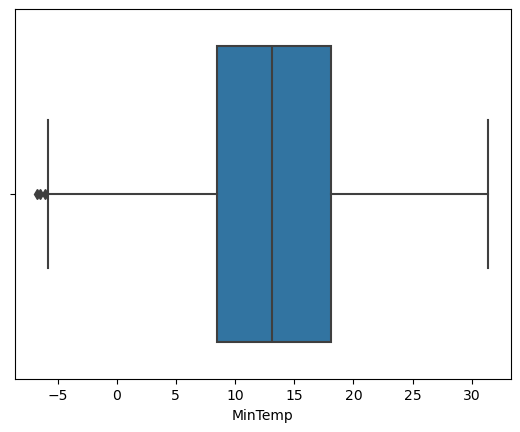

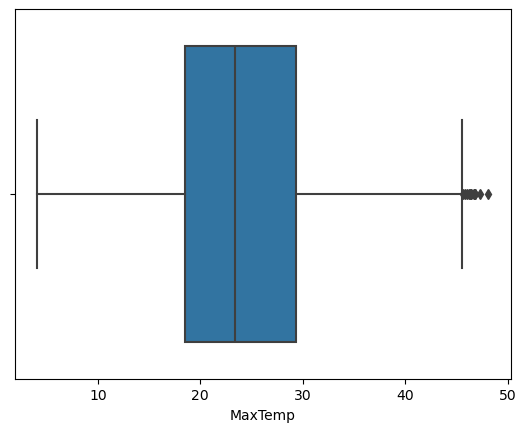

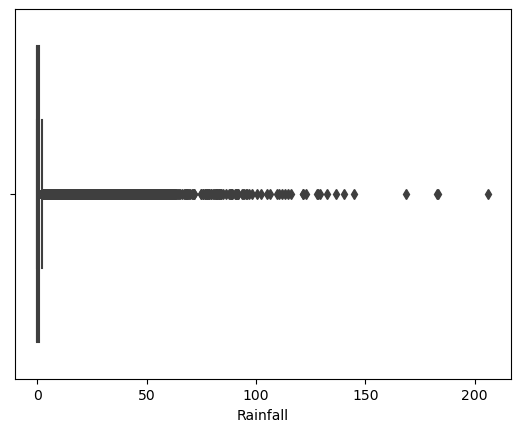

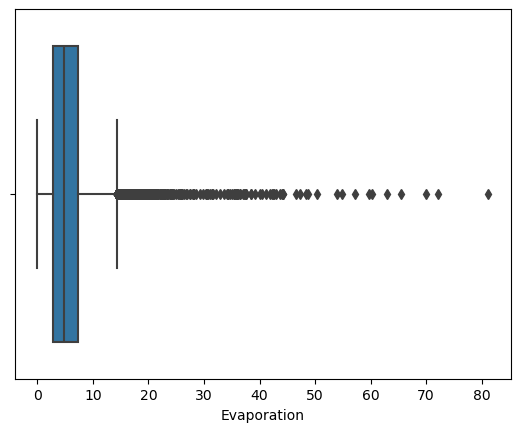

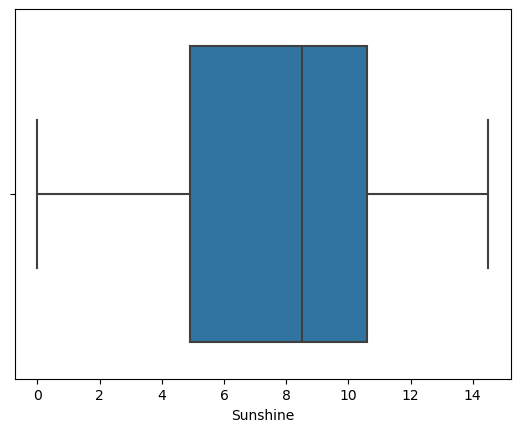

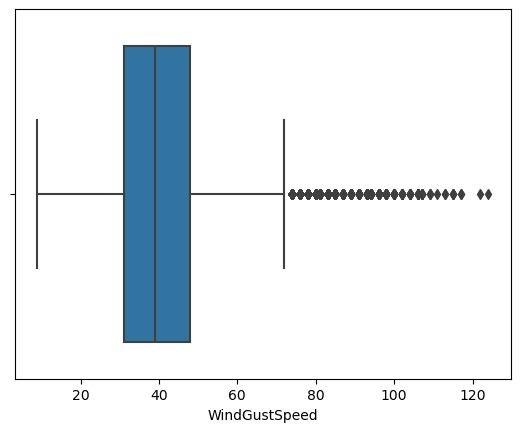

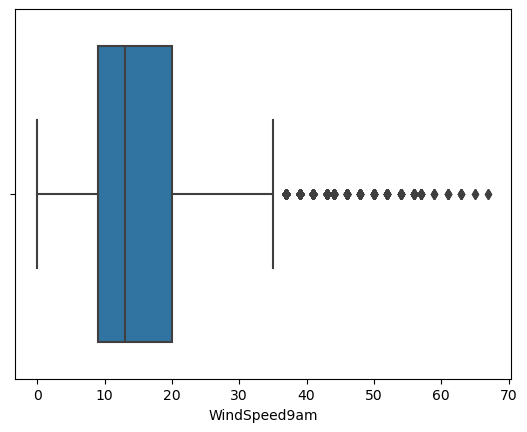

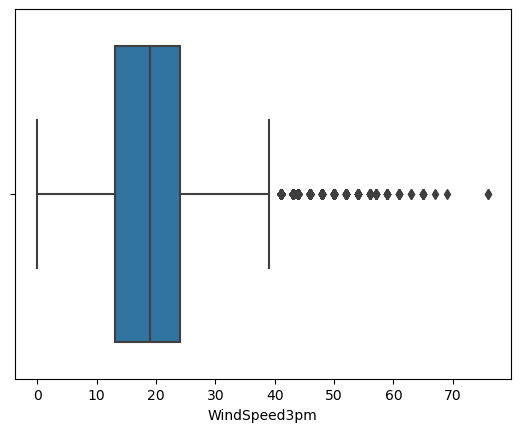

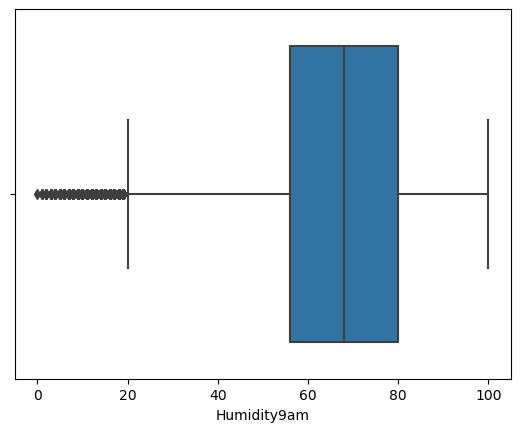

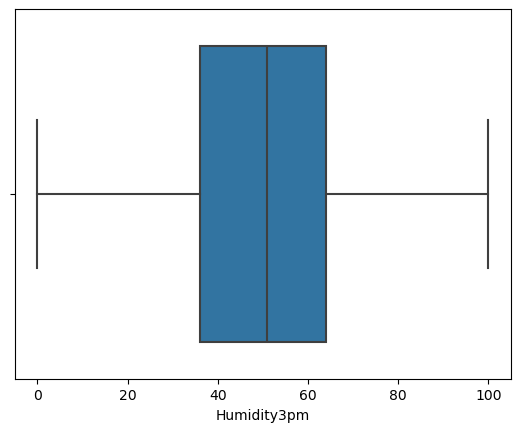

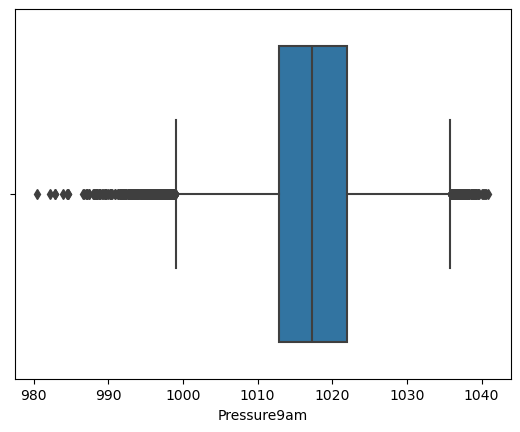

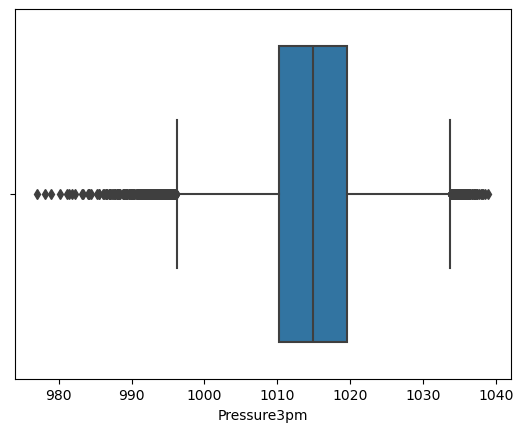

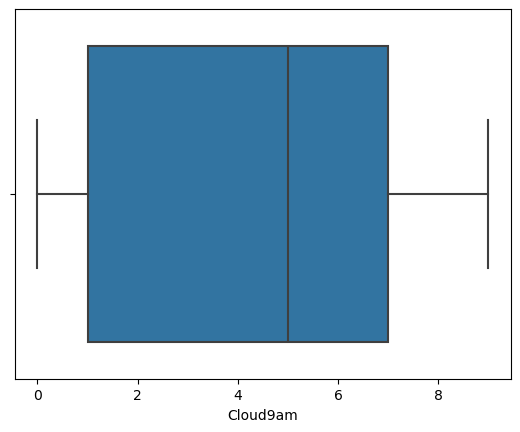

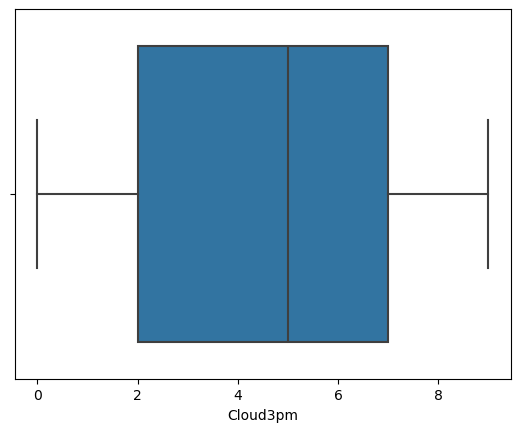

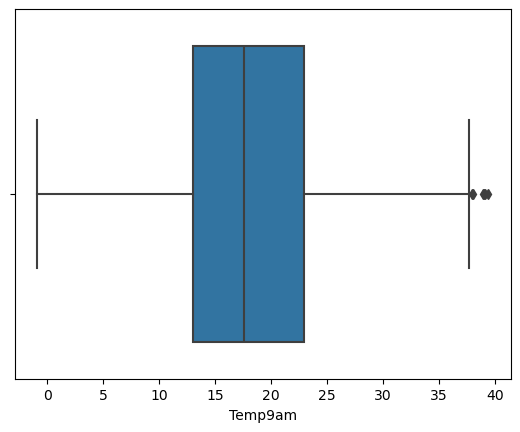

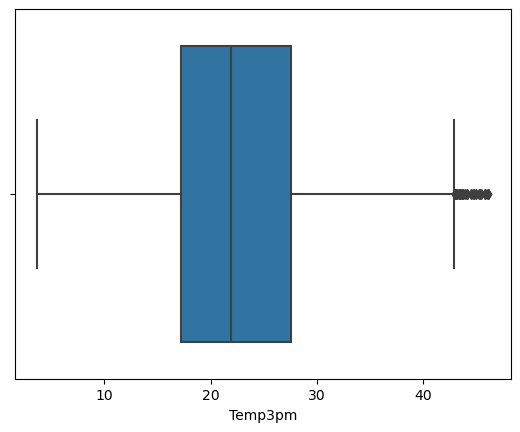

In [23]:
for col in df.select_dtypes(include=float).columns:
    plt.figure()
    sns.boxplot(x=df[col])
plt.show()

**program diatas** digunakan untuk membuat diagram kotak (boxplot) untuk setiap kolom numerik dengan tipe data float dalam DataFrame df

In [24]:
df_float = df[df.select_dtypes(include=float).columns]

# Print shape lama dari dataset yang belum di handling outliernya
print("Bentuk Shape Lama: ", df_float.shape)

# IQR
# Kalkulasi batas atas dan bawah
Q1 = df[df.select_dtypes(include=float).columns].quantile(0.25)
Q3 = df[df.select_dtypes(include=float).columns].quantile(0.75)

IQR = Q3 - Q1
lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

# Membuat array dengan nilai boolean yang menunjukkan baris-baris yang merupakan outlier
upper_array = (df_float > upper).any(axis=1)
lower_array = (df_float < lower).any(axis=1)

# Menghapus outlier dari df_float
df_float = df_float[~upper_array]
df_float = df_float[~lower_array]

# Print shape baru dari dataset yang sudah di handling outliernya
print("Bentuk Shape Baru: ", df_float.shape)

Bentuk Shape Lama:  (62294, 16)
Bentuk Shape Baru:  (47156, 16)


**program diatas** digunakan menghapus nilai outlier dari DataFrame df_float dan mencetak bentuk DataFrame sebelum dan sesudah penanganan outlier dan adapun pendekatan yang digunakan di sini yaitu dengan mengidentifikasi nilai outlier menggunakan metode IQR (Interquartile Range) dan menghapus baris yang memiliki nilai outlier pada setidaknya satu kolom numerik.






In [25]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.00000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000
mean,13.320545,23.940874,2.141139,5.377068,7.647690,40.453013,15.108678,19.54262,66.563168,50.460430,1017.385758,1014.958921,4.279577,4.344544,17.991362,22.436782,2012.136899,6.409975,15.722959
std,6.372635,6.890906,6.949013,3.642557,3.763977,12.975827,8.628194,8.62582,18.421690,20.204592,6.957664,6.921487,2.802830,2.651058,6.509657,6.752409,2.449623,3.422503,8.790760
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.00000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.900000,3.700000,2007.000000,1.000000,1.000000
25%,8.500000,18.500000,0.000000,2.800000,4.900000,31.000000,9.000000,13.00000,56.000000,36.000000,1012.800000,1010.200000,1.000000,2.000000,13.000000,17.200000,2010.000000,3.000000,8.000000
50%,13.100000,23.400000,0.000000,4.800000,8.500000,39.000000,13.000000,19.00000,68.000000,51.000000,1017.300000,1014.900000,5.000000,5.000000,17.600000,21.900000,2012.000000,6.000000,16.000000
75%,18.100000,29.300000,0.800000,7.400000,10.600000,48.000000,20.000000,24.00000,80.000000,64.000000,1022.000000,1019.600000,7.000000,7.000000,22.900000,27.500000,2014.000000,9.000000,23.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.00000,100.000000,100.000000,1040.900000,1038.900000,9.000000,9.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


**df.describe()** : digunakan untuk menghasilkan ringkasan statistik deskriptif untuk setiap kolom numerik dalam DataFrame df juga dapat memberikan informasi statistik penting.

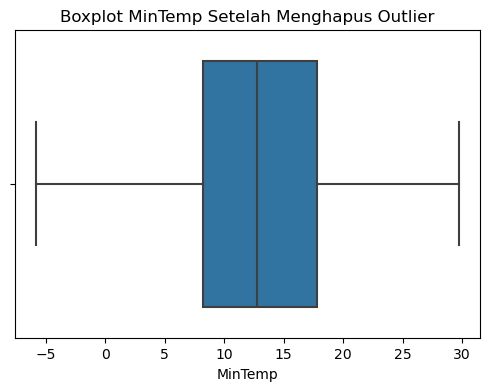

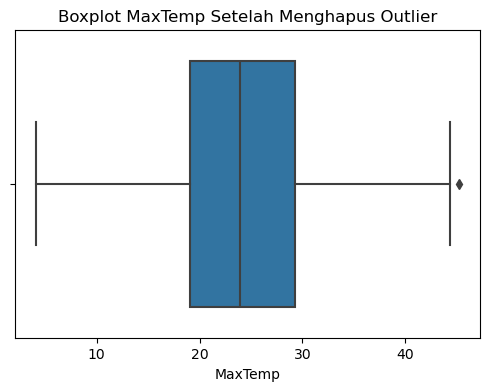

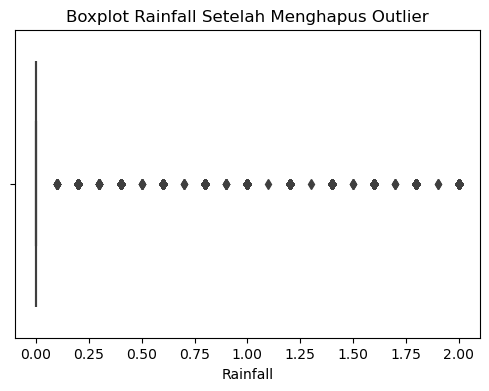

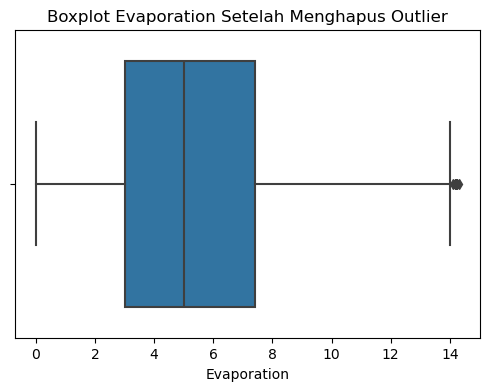

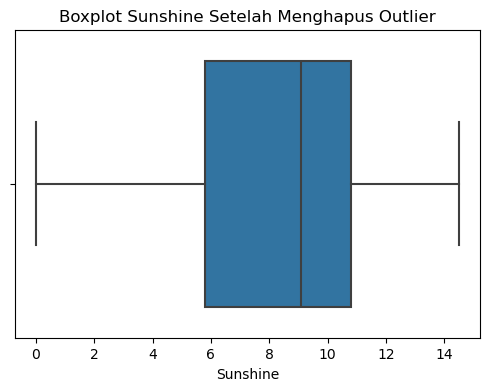

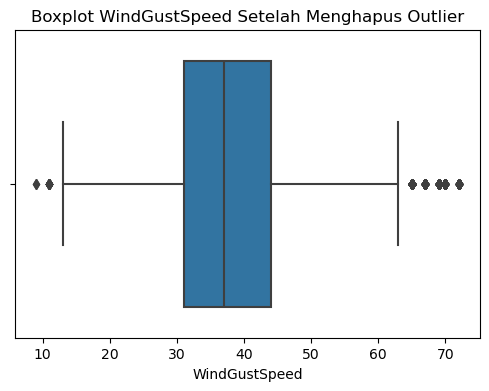

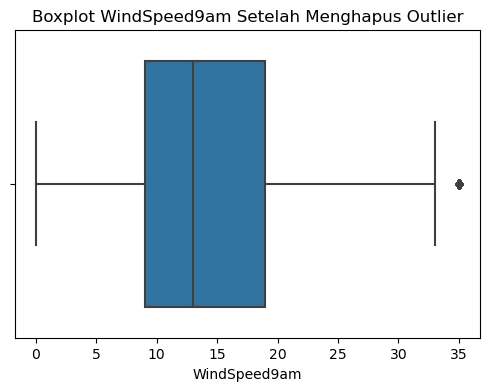

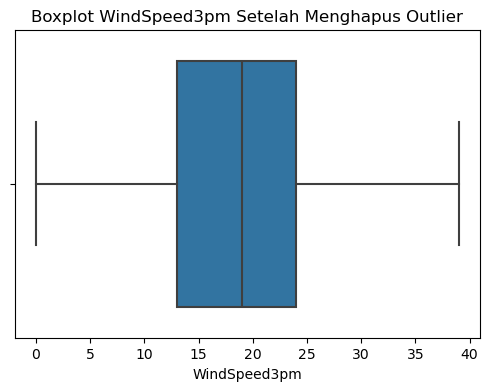

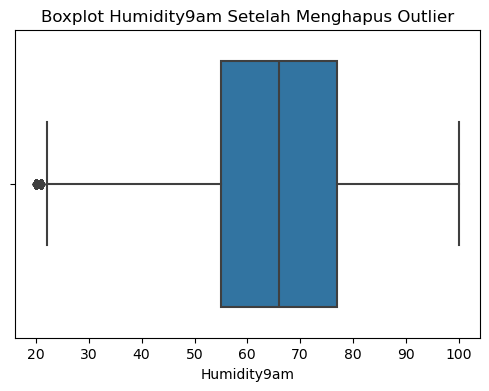

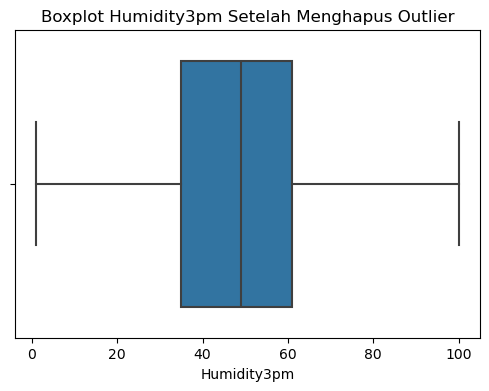

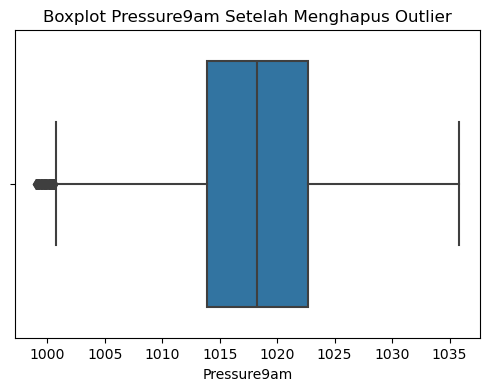

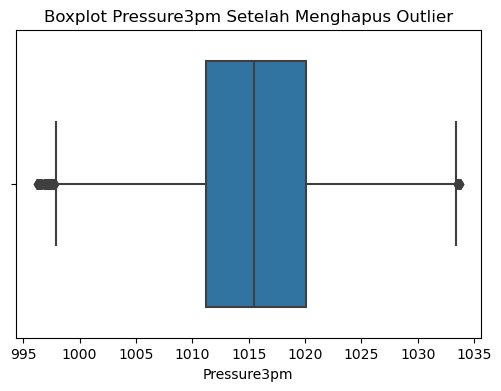

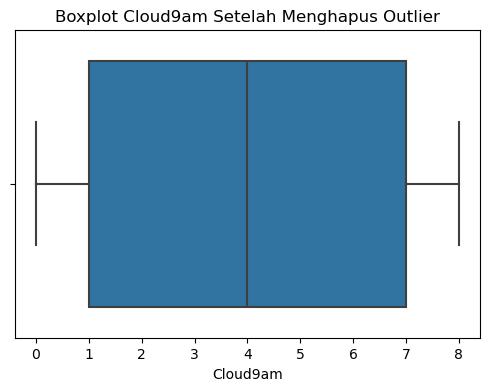

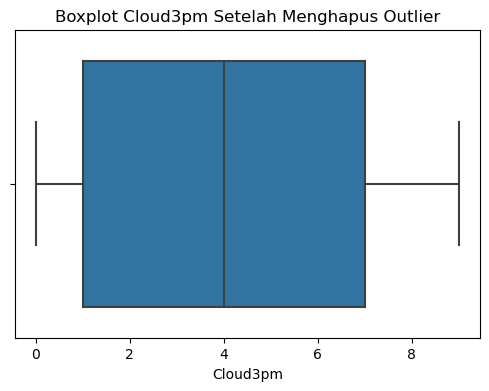

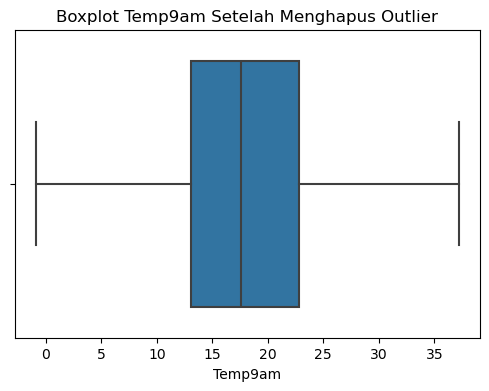

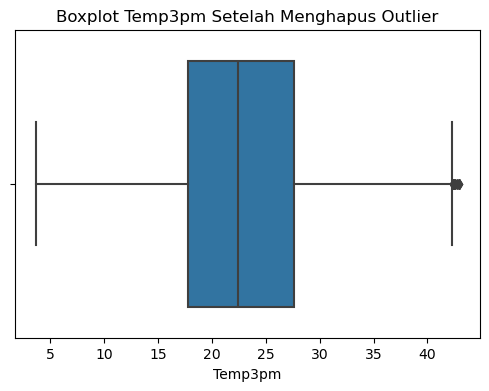

In [26]:
for col in df_float.columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=df_float[col])
    plt.title(f"Boxplot {col} Setelah Menghapus Outlier") 
    plt.show()

**program diatas** : digunakan untuk membuat boxplot untuk setiap kolom numerik dalam DataFrame df_float setelah nilai outlier dihapus.

## Exploratory Data Analysis

In [27]:
mpl.style.use(['ggplot'])

**mpl.style.use(['ggplot'])** : digunakan untuk mengatur berbagai properti visual seperti warna, font, dan tata letak plot agar sesuai dengan gaya ggplot, memberikan tampilan grafik yang lebih konsisten dan estetis.

### Lokasi paling sering hujan

In [28]:
five_location_rain = pd.DataFrame((df['RainToday'] == 'Yes').groupby(df['Location']).sum().sort_values(ascending=False)).head()

**program diatas** : berisi lima lokasi dengan jumlah hari hujan tertinggi, diurutkan dari yang tertinggi ke yang terendah, berdasarkan data dalam kolom 'RainToday' dari DataFrame df.

In [29]:
five_location_rain

,RainToday
Location,
Portland,840
Darwin,814
Cairns,765
MountGambier,756
NorfolkIsland,755


**five_location_rain** : digunakan untuk menampilkan isi dari DataFrame yang telah dibuat sebelumnya dengan nama five_location_rain yang dimana pada output diatas terdapat 5 lokasu dengan jumlah hari dengan hujan tertinggi.

Text(0.5, 1.0, '5 locations with the most rain in 10 years')

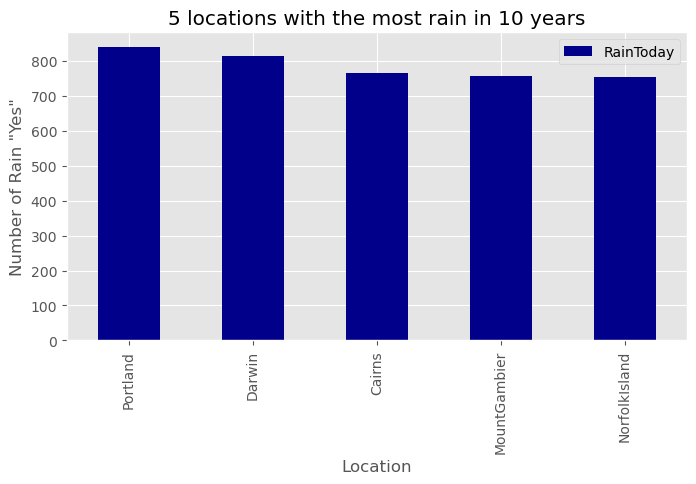

In [30]:
five_location_rain.plot(kind='bar',
                        figsize=(8, 4),
                        color='darkblue')

plt.ylabel('Number of Rain "Yes"')
plt.title('5 locations with the most rain in 10 years')

**program diatas** : digunakan untuk membuat diagram batang (bar chart) berdasarkan DataFrame five_location_rain yang dimana terdapat 5 tempat paling sering hujan di australia dalam 10 tahun yang pada peringkat pertama diduduki oleh portland dengan total 840 lalu diikuti kota darwin dengan 814 kali hujan.

### Distribusi Rain Tomorrow

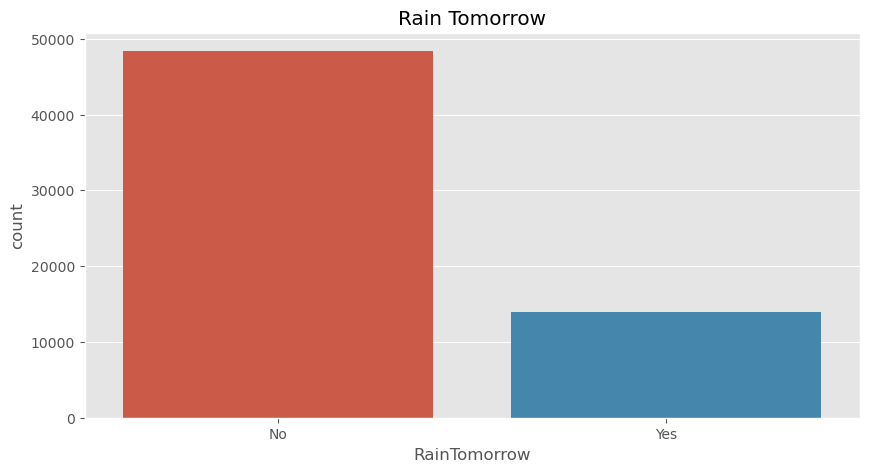

In [31]:
plt.figure(figsize=(10, 5))

sns.countplot(x='RainTomorrow', data=df)
plt.title('Rain Tomorrow')

plt.show()

**program diatas** : digunakan untuk memberikan visualisasi tentang seberapa sering hujan terjadi besok berdasarkan data dalam kolom 'RainTomorrow' dari DataFrame df.

Pada grafik diatas terlihat bahwa kolom 'no' lebih tinggi daripada 'yes' yang artinya prediksi untuk hujan tidak akan turun besok lebih mungkin daripada hujan akan turun.




In [32]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     48385
Yes    13909
Name: count, dtype: int64

**df['RainTomorrow'].value_counts()** : digunakan untuk  menghitung jumlah munculnya setiap nilai unik dalam kolom 'RainTomorrow' dari DataFrame df

Pada output diatas terdapat banyaknya nilai pada bagian 'no' dibandingkan 'yes' yang artinya prediksi untuk tidak akan hujan lebih tinggi dari yang akan hujan

### Distribusi Curah Hujan

<Axes: xlabel='Day', ylabel='Rainfall'>

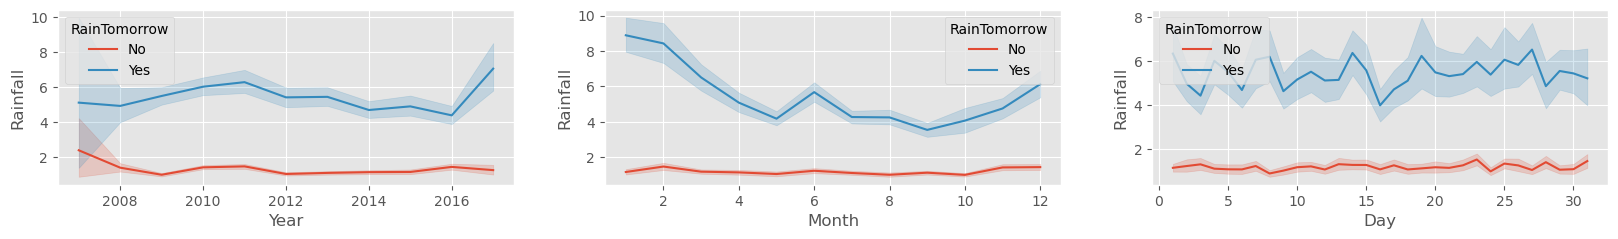

In [33]:
plt.figure(figsize=(20, 5))

plt.subplot(2, 3, 1)
sns.lineplot(x='Year', y='Rainfall', hue='RainTomorrow', data=df)

plt.subplot(2, 3, 2)
sns.lineplot(x='Month', y='Rainfall', hue='RainTomorrow', data=df)

plt.subplot(2, 3, 3)
sns.lineplot(x='Day', y='Rainfall', hue='RainTomorrow', data=df)

**program diatas** : digunakan untuk cepat melihat pola hubungan antara variabel curah hujan dan variabel waktu ('Year', 'Month', 'Day') untuk kondisi cuaca 'RainTomorrow'.

Pada grafik diatas menunjukkan distribusi dari curah hujan mulai dari tahun, bulan, hari.

## Data Preprocessing

In [34]:
df.drop(columns=['Location', 'Date', 'Year', 'Month', 'Day'], inplace=True)

In [35]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [36]:
df.replace({pd.NA: "No", None: "No"}, inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [37]:
label = LabelEncoder()

In [38]:
df['RainToday'] = label.fit_transform(df['RainToday'])
df['RainTomorrow'] = label.fit_transform(df['RainTomorrow'])
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


### Feature Selection

Disini kita akan melihat attribute atau kolom mana saja yang memiliki hubungan paling dekat dengan target yaitu **Rain Tomorrow**, disini heatmap akan digunakan untuk mempermudah pencariannya.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62294 entries, 6049 to 142302
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        62294 non-null  float64
 1   MaxTemp        62294 non-null  float64
 2   Rainfall       62294 non-null  float64
 3   Evaporation    62294 non-null  float64
 4   Sunshine       62294 non-null  float64
 5   WindGustDir    62294 non-null  object 
 6   WindGustSpeed  62294 non-null  float64
 7   WindDir9am     62294 non-null  object 
 8   WindDir3pm     62294 non-null  object 
 9   WindSpeed9am   62294 non-null  float64
 10  WindSpeed3pm   62294 non-null  float64
 11  Humidity9am    62294 non-null  float64
 12  Humidity3pm    62294 non-null  float64
 13  Pressure9am    62294 non-null  float64
 14  Pressure3pm    62294 non-null  float64
 15  Cloud9am       62294 non-null  float64
 16  Cloud3pm       62294 non-null  float64
 17  Temp9am        62294 non-null  float64
 18  Temp3pm

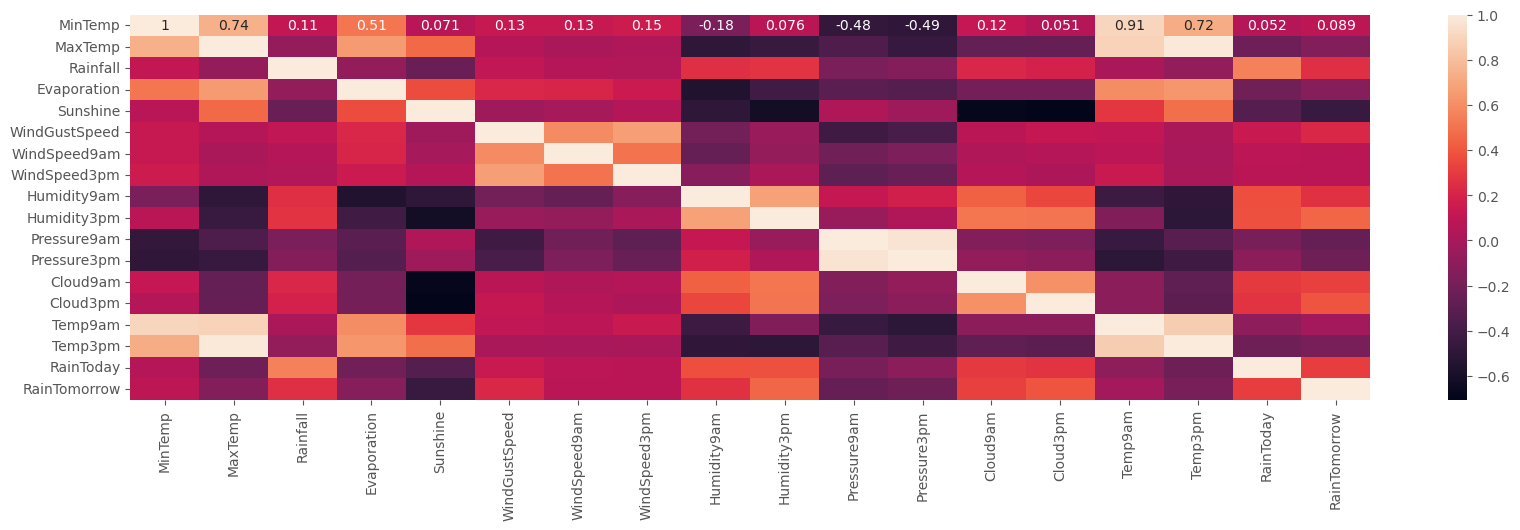

In [40]:
# Mengubah data integer ke float
df[['RainToday', 'RainTomorrow']] = df[['RainToday', 'RainTomorrow']].astype(float)


plt.figure(figsize=(20, 5))

# Memilih kolom-kolom berjenis data float dari DataFrame
numeric_columns = df.select_dtypes(include=['float']).columns

# Membuat matriks korelasi untuk kolom-kolom numerik
correlation_matrix = df[numeric_columns].corr()

# Membuat heatmap dengan Seaborn
sns.heatmap(correlation_matrix, annot=True)

# Menampilkan heatmap
plt.show()

### Final Data

In [41]:
final_data = df[["RainTomorrow", "RainToday", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", "Rainfall", "Sunshine", "WindGustSpeed", "Pressure9am", "Pressure3pm"]]

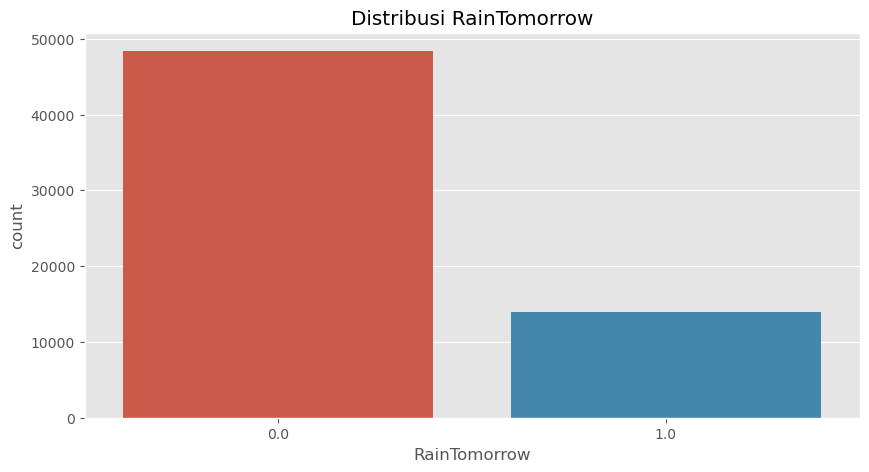

In [42]:
plt.figure(figsize=(10, 5))

sns.countplot(x='RainTomorrow', data=final_data)
plt.title('Distribusi RainTomorrow')

plt.show()

### Scalling Data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
X = final_data.drop(columns='RainTomorrow')
y = final_data['RainTomorrow']

In [45]:
X = scaler.fit_transform(X)

### Resampling Data - Under Sampling

Resampling dilakukan agar data seimbang. Resampling ini digunakan pada dataset yang memiliki imbalanced class. Pada dataset ini, terlihat jelas pada Target RainTomorrow sangat berbeda jauh antara data yang hujan atau tidak. Maka dilakukan resampling menggunakan scikitlearn resample. Data dibawah ini akan dilakukan resampling dengan metode under sampling, yaitu menghapus data major agar supaya datanya balanced dengan data minor

In [46]:
# import the Random Under Sampler object.
from imblearn.under_sampling import RandomUnderSampler

# create the object.
under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# fit the object to the training data.
x_train_under, y_train_under = under_sampler.fit_resample(X, y)

In [47]:
y_train_under.value_counts()

RainTomorrow
0.0    13909
1.0    13909
Name: count, dtype: int64

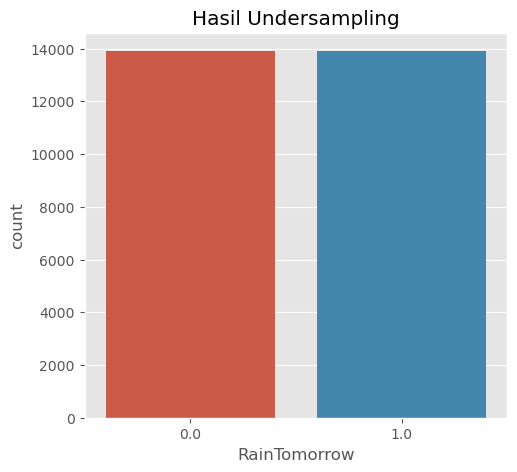

In [48]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train_under)
plt.title('Hasil Undersampling')


plt.show()

### Splitting Data

Membagi data menjadi 80% untuk training dan 20% untuk dilakukan testing.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train_under, y_train_under, test_size=0.2)

Data diatas sudah dilakukan UnderSampling dan Oversampling, Undersampling atau membentuk data yang major agar mengikuti data yang minor dengan cara menghapus data secara random agar data menjadi balanced. Sedangkan Oversampling kebalikannya dari undersampling. Membuat data yang minor untuk mengikuti data yang major, dengan cara menambahkan duplikasi data. Hal ini dilakukan agar pada saat modeling tidak terjadi bias yang dikarenakan imbalanced class.

## Modeling

Pada modelling kali ini akan membandingkan antara algoritma Logistic Regression dengan Support Vector Machine (SVM) untuk melakukan prediksi terkait "Apakah besok hujan?"

In [54]:
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

### Logistic Regression

In [56]:
logres = LogisticRegression(class_weight="balanced", random_state=42, max_iter=5000)
logres.fit(X_train, y_train)

lr_pred = logres.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Accuracy Score:  0.8010424155283968
[[2304  526]
 [ 581 2153]]
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      2830
         1.0       0.80      0.79      0.80      2734

    accuracy                           0.80      5564
   macro avg       0.80      0.80      0.80      5564
weighted avg       0.80      0.80      0.80      5564



### Hyperparameters Tuning - Logistic Regression

In [57]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [58]:
# List Parameter yang akan diuji
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define model and parameters
hyperparameters = dict(solver=solvers, penalty=penalty, C=c_values)
logreg = LogisticRegression()

grid_search = GridSearchCV(estimator=logreg, param_grid=hyperparameters, n_jobs=-1, cv=10, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

# Prediksi menggunakan model baru
y_pred_lr_hyper = grid_result.predict(X_test)

# Check performa dari model
print('Accuracy Score: ', accuracy_score(y_test, y_pred_lr_hyper))
print('Classification Report:\n', classification_report(y_test, y_pred_lr_hyper))
print('ROC-AUC Score: ', roc_auc_score(y_test, y_pred_lr_hyper))

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Accuracy Score:  0.7999640546369519
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      2830
         1.0       0.80      0.79      0.79      2734

    accuracy                           0.80      5564
   macro avg       0.80      0.80      0.80      5564
weighted avg       0.80      0.80      0.80      5564

ROC-AUC Score:  0.7997773101966857
Best: 0.791588 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.790914 (0.008999) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.790914 (0.008999) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.790914 (0.008999) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.790959 (0.009034) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.790959 (0.009034) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.790959 (0.009034) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.791094 (0.009055) with: {'C': 1.0, 'penalty': 'l2', '

Disini dilakukan percobaan untuk melakukan hypertuning parameter pada model menggunakan GridSearch. Akurasi memang terlihat membaik namun tidak cukup signifikan

### Support Vector Machine

In [59]:
# Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
        
pred_svm = svm_model.predict(X_test)

In [60]:
print("Accuracy Score:", accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

Accuracy Score: 0.8026599568655644
[[2258  572]
 [ 526 2208]]
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      2830
         1.0       0.79      0.81      0.80      2734

    accuracy                           0.80      5564
   macro avg       0.80      0.80      0.80      5564
weighted avg       0.80      0.80      0.80      5564



### Menentukan kisi parameter yang akan dicari
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 'scale'], 'kernel': ['linear', 'rbf']}

### Buat model SVM
svm_model = SVC(probability=True)

### Buat objek GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

### Fit grid search ke data latih
grid_search.fit(X_train, y_train)

### Mencetak parameter terbaik dan akurasi yang sesuai
print("Parameter Terbaik: ", grid_search.best_params_) print("Akurasi Terbaik: ", grid_search.best_score_)

### Dapatkan model SVM terbaik
svm_model_terbaik = grid_search.best_estimator_

### Lakukan prediksi menggunakan model terbaik
pred_svm = svm_model_terbaik.predict(X_test)

Telah dicoba melakukan tuning hyperparameter pada model SVM. Namun pada prosesnya memakan banyak resource pada device serta memakan waktu yang sangat lama sehingga diputuskan untuk tidak menyertakan proses tersebut.

### Evaluate Model

In [61]:
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr_hyper))
print("SVM:", accuracy_score(y_test, pred_svm))

Logistic Regression: 0.7999640546369519
SVM: 0.8026599568655644


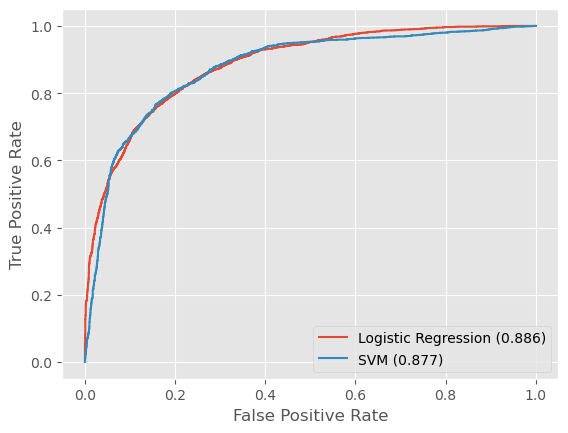

In [62]:
#define metrics
y_pred_proba1 = grid_result.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba1)
auc1 = auc(fpr1, tpr1)

y_pred_proba2 = svm_model.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2)
auc2 = auc(fpr2, tpr2)

#create ROC curve
plt.plot(fpr1,tpr1, label='Logistic Regression (%0.3f)' % auc1)
plt.plot(fpr2,tpr2, label='SVM (%0.3f)' % auc2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

plt.show()

## Predictive System

Data yang dibutuhkan pada input data.
final_data = "RainToday", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", "Rainfall", "Sunshine", "WindGustSpeed", "Pressure9am", "Pressure3pm"

In [63]:
final_data

,RainTomorrow,RainToday,Cloud9am,Cloud3pm,Humidity9am,Humidity3pm,Rainfall,Sunshine,WindGustSpeed,Pressure9am,Pressure3pm
6049,0.0,0.0,2.0,5.0,20.0,13.0,0.0,12.3,48.0,1006.3,1004.4
6050,0.0,0.0,1.0,1.0,30.0,8.0,0.0,13.0,37.0,1012.9,1012.1
6052,0.0,0.0,1.0,6.0,42.0,22.0,0.0,10.6,46.0,1012.3,1009.2
6053,0.0,0.0,1.0,5.0,37.0,22.0,0.0,12.2,31.0,1012.7,1009.1
6054,0.0,0.0,1.0,6.0,19.0,15.0,0.0,8.4,35.0,1010.7,1007.4
...,...,...,...,...,...,...,...,...,...,...,...
142298,0.0,0.0,0.0,1.0,63.0,32.0,0.0,11.0,35.0,1013.9,1010.5
142299,0.0,0.0,7.0,0.0,56.0,28.0,0.0,8.6,37.0,1014.6,1011.2
142300,0.0,0.0,0.0,0.0,46.0,23.0,0.0,11.0,33.0,1015.3,1011.8
142301,0.0,0.0,1.0,1.0,62.0,58.0,0.0,10.6,26.0,1014.9,1010.7


In [64]:
# Percobaan pertama
input_data = [0, 3.0, 2.0, 30.0, 43.0, 2.0, 10.0, 2.0, 9.0, 10.0]

In [65]:
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
sample_scale = scaler.transform(input_data_reshape)
prediction = grid_result.predict(sample_scale)

In [66]:
print(prediction)

if (prediction == 0):
    print("Besok tidak akan hujan")
else:
    print("Besok akan hujan")

[1.]
Besok akan hujan


In [67]:
# Percobaan ke-2
input_data = [1, 7.0, 0.0, 12.0, 13.0, 0.0, 10.6, 33.0, 1014.6, 1004.4]

In [68]:
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
sample_scale = scaler.transform(input_data_reshape)
prediction = grid_result.predict(sample_scale)

In [69]:
print(prediction)

if (prediction == 0):
    print("Besok tidak akan hujan")
else:
    print("Besok akan hujan")

[0.]
Besok tidak akan hujan


## Pengambilan Kesimpulan

Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.

1. Dataset yang digunakan dalam proyek ini adalah "weatherAUS.csv" yang terdiri dari145460 baris dan 23 kolom menjadi 62294 baris dan 26 kolom . Didalamnya berisi informasi curah hujan yang dilakukan di australia. Dari begitu banyaknya fitur perlu diketahui fitur mana saja yang memiliki korelasi yang cukup, hal itu sangat berguna ketika dalam proses prediksi, dikarenakan tujuan utama dalam projek ini adalah untuk memprediksi hujan maka fitur raintomorrow merupakan variabel dependent yang akan menjadi predictand. 

2. Pada section EDA bisa dilihat, bahwa :

Berdasarkan grafik, diketahui bahwa persentase  'tidak akan hujan' lebih besar dari 'akan hujan'.Top 5 Portland	840
Darwin	814
Cairns	765
MountGambier	756
NorfolkIsland yaitu : Financial District-South Station (dan sebaliknya), Back Bay-North End (dan sebaliknya). Top 5 Portland lalu diikuti	
Darwin	
Cairns	
MountGambier	
NorfolkIsland

3. Hasil Analisis 

Model telah berhasil digunakan untuk memprediksi dengan angka 0.8026599568655644 